In [ ]:
!pip install transformers[torch]
!pip install accelerate -U

ссылка на данные
https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification/data

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/hw/ecommerceDataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
STOPWORDS  = stopwords.words('english') + ['im']
STOPWORDS.remove('not')
STOPWORDS.remove('no')

lemmatizer = WordNetLemmatizer()

#### Функция очистки и лемматизации текста
def clean_text(text):
  #очистить текст от тегов html и привести к нижнему регистру
  text = BeautifulSoup(text).get_text().lower()

  #очистить текст от ссылок html
  text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text)

  #очистить текст от всех символов кроме букв латинского алфавита
  text = re.sub("[^a-z]", " ", text)

  #разбить текст на слова
  text_words = text.split()

  #выполнить лематизацию текста и удалить стоп-слова
  result_words = [lemmatizer.lemmatize(word) for word in text_words if not word in STOPWORDS]

  return (" ".join(result_words))

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import models
from keras import Sequential
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.metrics import AUC
from keras.regularizers import L1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df = pd.read_csv(file_path,header=None)

In [ ]:
df.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [ ]:
df[0].value_counts()

0
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       50425 non-null  object
 1   1       50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df[1] = df[1].apply(lambda x:clean_text(x))

<ipython-input-10-fe3469a47e7a>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text).get_text().lower()


In [ ]:
df[1]

0        paper plane design framed wall hanging motivat...
1        saf floral framed painting wood inch x inch sp...
2        saf uv textured modern art print framed painti...
3        saf flower print framed painting synthetic inc...
4        incredible gift india wooden happy birthday un...
                               ...                        
50420    strontium microsd class gb memory card black m...
50421    crossbeats wave waterproof bluetooth wireless ...
50422    karbonn titanium wind w white karbonn titanium...
50423    samsung guru fm plus sm b e black colour black...
50424                          micromax canvas win w white
Name: 1, Length: 50424, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labeles = LabelEncoder()
labels = to_categorical(labeles.fit_transform(df[0]), num_classes=4)

labels.shape

(50424, 4)

In [ ]:
#максимальное количество слов в твите
TEXT_MAX_LEN = 128
#количество наиболее часто используемых слов
TEXT_MAX_WORDS = 27000

#создать токенайзер
tokenizer = Tokenizer(num_words=TEXT_MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
#создать словарь на основе слов из текста
tokenizer.fit_on_texts(df[1])
#преобразовать каждый текст в последовательность чисел
sequences = tokenizer.texts_to_sequences(df[1])


#получим количество уникальных слов
print('Найдено уникальных слов %s'%len(tokenizer.word_index))

NameError: name 'Tokenizer' is not defined

In [ ]:
#преобразуем последовательность индексов слов в массив numpy размером (num_samples, max_len)
texts = pad_sequences(sequences, maxlen=TEXT_MAX_LEN)

print(texts.shape)

(50424, 128)


In [ ]:
#перемешиваем данные
indices = np.arange(texts.shape[0])    # перемешиваем данные
np.random.shuffle(indices)
X = texts[indices]
y = labels[indices]

In [ ]:
TEST_SIZE = 5000

X_test = X[:TEST_SIZE]
y_test = y[:TEST_SIZE]

X_train = X[TEST_SIZE:]
y_train = y[TEST_SIZE:]

In [ ]:
import re
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical, pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.preprocessing import LabelEncoder

RANDOM_STATE = 42

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(RANDOM_STATE)

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=TEXT_MAX_WORDS, output_dim=TEXT_MAX_LEN),
    tf.keras.layers.Bidirectional(keras.layers.GRU(units=128, return_sequences=True)),
    tf.keras.layers.Bidirectional(keras.layers.GRU(units=128)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1024, kernel_initializer='he_normal', activation='relu'),

    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss= 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),
              metrics= ['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=1e-4,
        patience=10,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        #monitor='val_accuracy',
        factor=0.2,
        patience=2
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'keras_LSTM_model.keras',
        monitor = 'val_loss',
        save_best_only=True
    )
]

print('Model summary:')
print(model.summary())

Model summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         3456000   
                                                                 
 bidirectional (Bidirection  (None, None, 256)         198144    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               296448    
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1024)              263168    
                                                                 
 dense_1 (Dense)             (None, 4)   

In [ ]:
#with tf.device('/cpu:0'):
with tf.device('/gpu:0'):
    history = model.fit(X_train, y_train, batch_size=1024, epochs=50,
                        callbacks=callbacks,
                        validation_split=0.2,
                        #class_weight = class_weights,
                        verbose=1)

print('\nModel history:')
print(history.history.keys())

Epoch 1/50
36/36 [==============================] - 25s 377ms/step - loss: 0.8767 - accuracy: 0.6615 - val_loss: 0.1873 - val_accuracy: 0.9469 - lr: 0.0100
Epoch 2/50
36/36 [==============================] - 8s 228ms/step - loss: 0.1114 - accuracy: 0.9704 - val_loss: 0.1137 - val_accuracy: 0.9690 - lr: 0.0100
Epoch 3/50
36/36 [==============================] - 9s 247ms/step - loss: 0.0383 - accuracy: 0.9903 - val_loss: 0.1279 - val_accuracy: 0.9686 - lr: 0.0100
Epoch 4/50
36/36 [==============================] - 9s 239ms/step - loss: 0.0216 - accuracy: 0.9947 - val_loss: 0.1164 - val_accuracy: 0.9714 - lr: 0.0100
Epoch 5/50
36/36 [==============================] - 8s 218ms/step - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.1358 - val_accuracy: 0.9730 - lr: 0.0020
Epoch 6/50
36/36 [==============================] - 8s 231ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.1453 - val_accuracy: 0.9731 - lr: 0.0020
Epoch 7/50
36/36 [==============================] - 8s 216ms/step - l

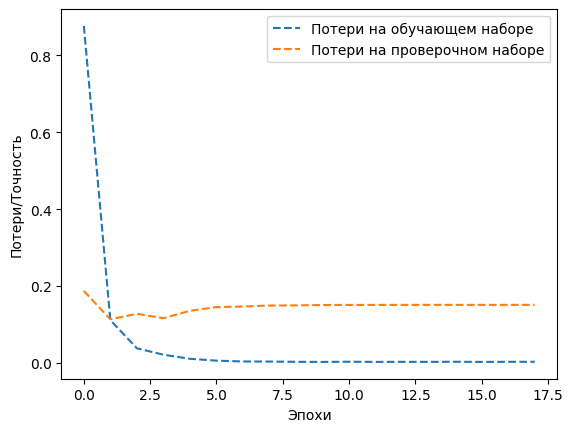

In [ ]:
plt.plot(history.history['loss'], linestyle = '--', label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], linestyle = '--', label='Потери на проверочном наборе')
plt.xlabel('Эпохи')
plt.ylabel('Потери/Точность')
plt.legend()
plt.show()

Transformers

In [4]:
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = BertForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
df_torch = pd.read_csv(file_path,header=None)

In [7]:
df_torch.dropna(inplace=True)

In [8]:
df_torch[1] = df_torch[1].apply(lambda x:clean_text(x))

<ipython-input-3-fe3469a47e7a>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text).get_text().lower()


In [9]:
from sklearn.preprocessing import LabelEncoder
labeles = LabelEncoder()
labels = labeles.fit_transform(df_torch[0])

In [ ]:
labeles.classes_

array(['Books', 'Clothing & Accessories', 'Electronics', 'Household'],
      dtype=object)

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(df_torch[1], labels, test_size=0.2, random_state=42)

In [13]:
data = pd.DataFrame({'text': X_train_, 'label': y_train_})
data_test = pd.DataFrame({'text': X_test_, 'label': y_test_})

In [14]:
!pip install datasets

In [14]:
from datasets import Dataset
dataset_train = Dataset.from_pandas(data)

In [15]:
dataset_test = Dataset.from_pandas(data_test)

In [17]:
def tokenize_function(examples):
    return tokenizer(examples["text"],
            padding="max_length",
            max_length=128,#128
            truncation=True)

In [18]:
tokenized_train = dataset_train.map(tokenize_function, batched=True)

Map:   0%|          | 0/40339 [00:00<?, ? examples/s]

In [19]:
tokenized_test = dataset_test.map(tokenize_function, batched=True)

Map:   0%|          | 0/10085 [00:00<?, ? examples/s]

In [ ]:
!pip install evaluate

In [30]:
import evaluate
accuracy = evaluate.load('accuracy')
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
dataset_train

Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 40339
})

In [21]:
batch_size = 32

In [22]:
from transformers import (
    TrainingArguments,
    Trainer
)

In [32]:
training_args = TrainingArguments(
    output_dir = 'bert-base-multilingual-uncased-sentiment',
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    #fp16=True
)

In [ ]:
args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

In [33]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [34]:
train_results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.328900,2.268356,0.235796
2,1.319900,2.571449,0.235796
3,1.350900,1.498556,0.235796
4,1.320300,2.287047,0.235796
5,1.310300,2.123345,0.235796
6,1.304200,2.497959,0.235796
7,1.305400,2.393307,0.235796
8,1.300900,2.328656,0.235796
9,1.298200,2.407999,0.235796
10,1.296300,2.482717,0.235796


In [35]:

trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =       10.0
  total_flos               = 24712464GF
  train_loss               =     1.3131
  train_runtime            = 2:32:20.63
  train_samples_per_second =     44.132
  train_steps_per_second   =       1.38


In [36]:
metrics = trainer.evaluate()
# some nice to haves:
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =       10.0
  eval_accuracy           =     0.2358
  eval_loss               =     1.4986
  eval_runtime            = 0:01:04.58
  eval_samples_per_second =    156.162
  eval_steps_per_second   =      4.893


Вывод:

*   TF модель показала хорошие метрики, а именно loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1512 - val_accuracy: 0.9729 - lr: 6.4000e-07
*  torch модель показала какую-то ерунду(
предположу, что дело в данных, которые подаю на обучение


